<a href="https://colab.research.google.com/github/nanekeshishyan/Weather-Data-Analysis/blob/main/weather_analysis_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# reading the dataset using pandas
weather_dataset = pd.read_csv('weatherHistory.csv')

In [ ]:
# preprocessing the dataset
weather_dataset['Formatted Date'] = pd.to_datetime(weather_dataset['Formatted Date'], utc=True)
weather_dataset['Formatted Date'] = weather_dataset['Formatted Date'].dt.tz_convert(None)

if len(weather_dataset['Loud Cover'].unique()) == 1:
    weather_dataset.drop(columns='Loud Cover', inplace=True)

Number of outliers in each column before removal: {'Temperature (C)': 39, 'Apparent Temperature (C)': 40, 'Humidity': 28, 'Wind Speed (km/h)': 1208, 'Wind Bearing (degrees)': 0, 'Visibility (km)': 0, 'Pressure (millibars)': 1288}



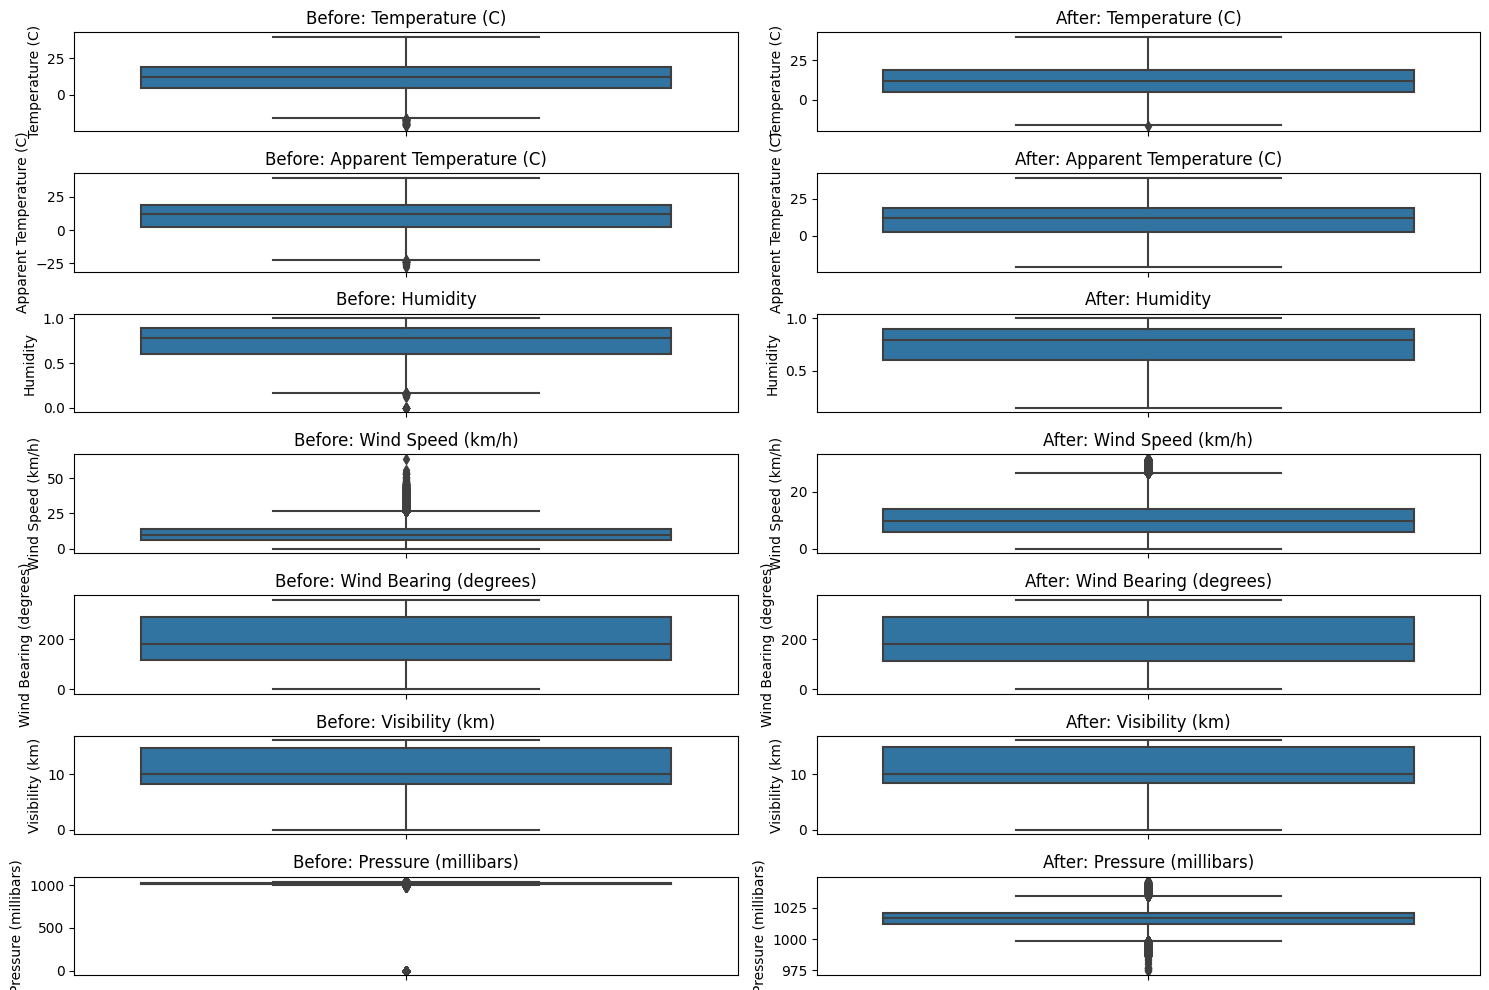

In [ ]:
# defining functions for calculating and removing Z-score outliers
def calculate_z_score(df, column):
    mean = df[column].mean()
    std = df[column].std()
    return (df[column] - mean) / std

def remove_outliers_z_score(df, column):
    mean = df[column].mean()
    std = df[column].std()
    z_scores = (df[column] - mean) / std
    return df[(z_scores >= -3) & (z_scores <= 3)]

# calculating and printing the number of outliers in each column
outliers = {}
numeric_columns = weather_dataset.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    z_scores = calculate_z_score(weather_dataset, column)
    outliers[column] = weather_dataset[(z_scores < -3) | (z_scores > 3)]
outlier_counts = {column: len(outliers_df) for column, outliers_df in outliers.items()}
print(f"Number of outliers in each column before removal: {outlier_counts}\n")

# plotting box plots before removing outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 2, 2*i-1)
    sns.boxplot(y=weather_dataset[column])
    plt.title(f'Before: {column}')

# removing outliers
for column in numeric_columns:
    weather_dataset = remove_outliers_z_score(weather_dataset, column)

# plotting box plots after removing outliers
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 2, 2*i)
    sns.boxplot(y=weather_dataset[column])
    plt.title(f'After: {column}')

plt.tight_layout()
plt.show()

In [ ]:
# dealing with dublicated rows
print(f'The number of dublicated rows is: {weather_dataset.duplicated().sum()}')
weather_dataset = weather_dataset.drop_duplicates()

The number of dublicated rows is: 24


In [ ]:
# printing all the unique values in the categorical columns
print(f'ALL THE UNIQUE NAMES IN THE COLUMN "SUMMARY": {weather_dataset["Summary"].unique()}\n')
print(f'ALL THE UNIQUE NAMES IN THE COLUMN "PRECIP TYPE": {weather_dataset["Precip Type"].unique()}\n')

ALL THE UNIQUE NAMES IN THE COLUMN "SUMMARY": ['Partly Cloudy' 'Mostly Cloudy' 'Overcast' 'Foggy'
 'Breezy and Mostly Cloudy' 'Clear' 'Breezy and Partly Cloudy'
 'Breezy and Overcast' 'Humid and Mostly Cloudy' 'Humid and Partly Cloudy'
 'Breezy' 'Dry and Partly Cloudy' 'Dry' 'Humid and Overcast'
 'Breezy and Foggy' 'Light Rain' 'Drizzle' 'Dry and Mostly Cloudy' 'Rain']

ALL THE UNIQUE NAMES IN THE COLUMN "PRECIP TYPE": ['rain' 'snow' nan]



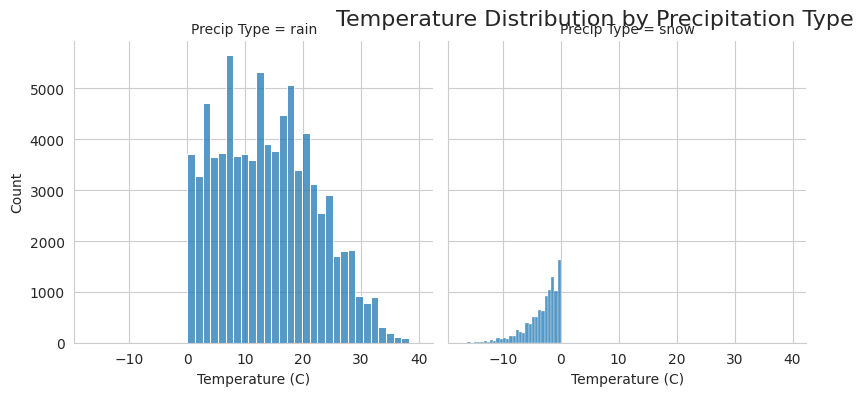

In [ ]:
# temperature depending on rain or snow (dependence of temperature and precip type)
sns.set_style("whitegrid")

g = sns.FacetGrid(weather_dataset, col='Precip Type', col_wrap=3, height=4)
g.map(sns.histplot, 'Temperature (C)', bins=30, kde=False)

g.fig.suptitle('Temperature Distribution by Precipitation Type', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.set_axis_labels('Temperature (C)', 'Count')
plt.show()

In [ ]:
# performing one-hot encoding for the Precip Type column
def one_hot(weather_dataset):
    weather_dataset['Precip Type'] = weather_dataset['Precip Type'].fillna('None')
    weather_dataset['Rain'] = ((weather_dataset['Precip Type'] == 'rain').astype(int) & (weather_dataset['Precip Type'] != 'None')).astype(int)
    weather_dataset['Snow'] =((weather_dataset['Precip Type'] == 'snow').astype(int) & (weather_dataset['Precip Type'] != 'None')).astype(int)

    return weather_dataset

weather_dataset = one_hot(weather_dataset)
print(f'PRECIP TYPE, RAIN AND SNOW COLUMNS:\n {weather_dataset[["Precip Type", "Rain", "Snow"]]} \n\n')
print(f'FIRST 5 ROWS OF EACH COLUMN:\n {weather_dataset.head()} \n\n')
print(f'ONLY THE ROWS WHERE THERE IS NONE: {weather_dataset.loc[(weather_dataset["Snow"] == 0) & (weather_dataset["Rain"] == 0), ("Snow", "Rain")]} \n\n')
print(f'ONLY THE ROWS WHERE THERE IS SNOW: {weather_dataset.loc[weather_dataset["Snow"] == 1,  ("Snow", "Rain")]} \n\n')
print(f'ONLY THE ROWS WHERE THERE IS RAIN: {weather_dataset.loc[weather_dataset["Rain"] == 1, ("Snow", "Rain")]} \n\n')


In [ ]:
# getting rid of 'Precip Type'
#weather_dataset = weather_dataset.drop(columns=['Precip Type'])
#print(f'FIRST 5 ROWS OF EACH COLUMN\n: {weather_dataset.head()}')

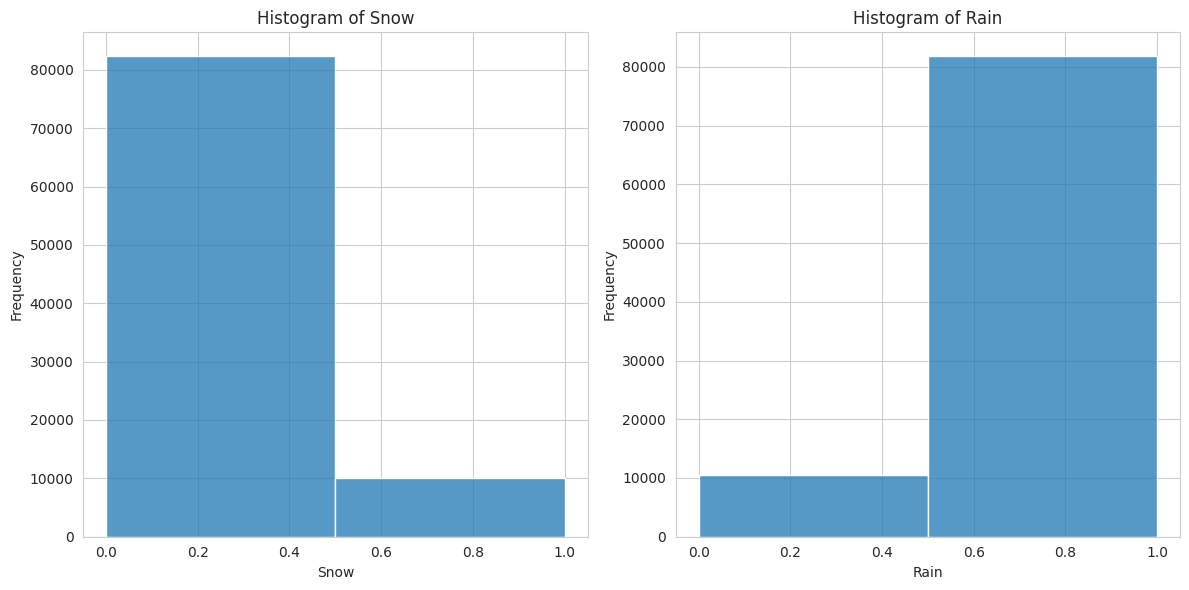

In [ ]:
# histograms of snow and rain (knowing that rain and snow are now binary)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(weather_dataset['Snow'], bins=2, kde=False)
plt.title('Histogram of Snow')
plt.xlabel('Snow')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(weather_dataset['Rain'], bins=2, kde=False)
plt.title('Histogram of Rain')
plt.xlabel('Rain')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Partly Cloudy               31595
Mostly Cloudy               27950
Overcast                    16415
Clear                       10148
Foggy                        7008
Breezy and Overcast           191
Breezy and Mostly Cloudy      157
Breezy and Partly Cloudy      111
Dry and Partly Cloudy          86
Light Rain                     63
Humid and Mostly Cloudy        40
Drizzle                        39
Dry                            34
Breezy                         20
Humid and Partly Cloudy        17
Dry and Mostly Cloudy          14
Rain                           10
Breezy and Foggy                9
Humid and Overcast              7
Name: Summary, dtype: int64


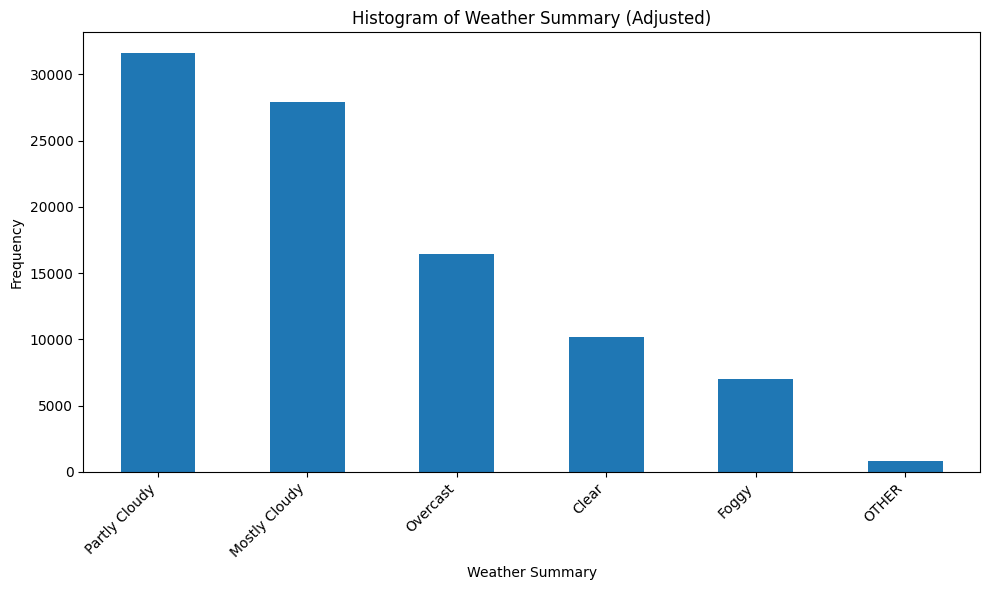

None


In [ ]:
# histogram for different values of the 'Summary' column
def histogram_for_summary(df):
    threshold = 5000
    summary_data = df['Summary']
    summary_counts = summary_data.value_counts()
    print(summary_counts)
    adjusted_summary_counts = {}
    for summary, count in summary_counts.items():
        if count < threshold:
            adjusted_summary_counts['OTHER'] = adjusted_summary_counts.get('OTHER', 0) + count
        else:
            adjusted_summary_counts[summary] = count

    plt.figure(figsize=(10, 6))
    pd.Series(adjusted_summary_counts).plot(kind='bar')
    plt.title('Histogram of Weather Summary (Adjusted)')
    plt.xlabel('Weather Summary')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.show()

print(histogram_for_summary(weather_dataset))

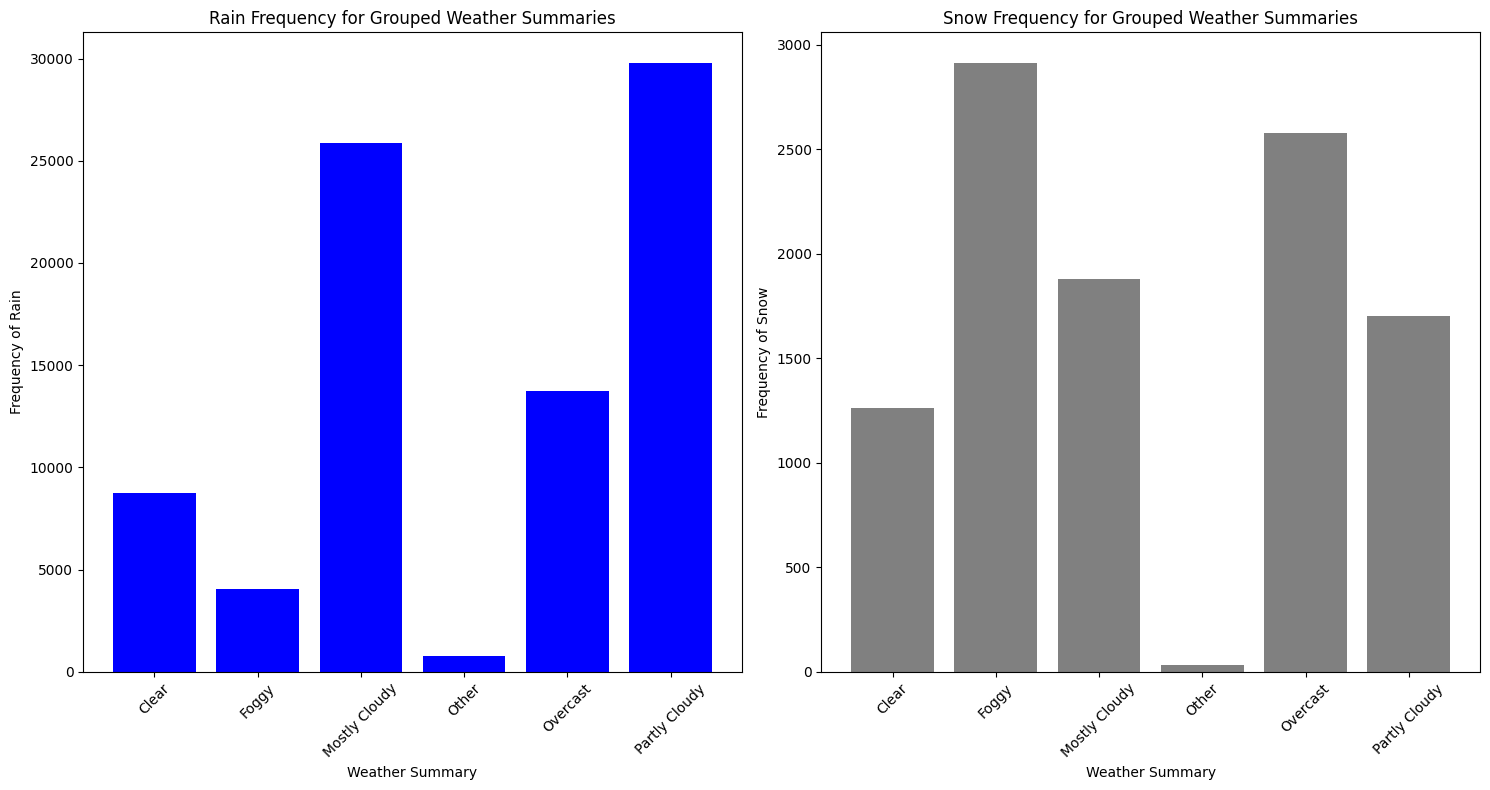

None


In [ ]:
# summary and precip type dependency
def histogram_for_summary(df):
    one_hot(df)

    threshold = 5000
    summary_counts = df['Summary'].value_counts()
    below_threshold = summary_counts[summary_counts < threshold].index.tolist()
    df['Summary_Grouped'] = df['Summary'].apply(lambda x: 'Other' if x in below_threshold else x)

    rain_frequency = df.groupby('Summary_Grouped')['Rain'].sum()
    snow_frequency = df.groupby('Summary_Grouped')['Snow'].sum()

    fig, axes = plt.subplots(1, 2, figsize=(15, 8))

    axes[0].bar(rain_frequency.index, rain_frequency.values, color='blue')
    axes[0].set_title('Rain Frequency for Grouped Weather Summaries')
    axes[0].set_xlabel('Weather Summary')
    axes[0].set_ylabel('Frequency of Rain')
    axes[0].tick_params(axis='x', rotation=45)

    axes[1].bar(snow_frequency.index, snow_frequency.values, color='gray')
    axes[1].set_title('Snow Frequency for Grouped Weather Summaries')
    axes[1].set_xlabel('Weather Summary')
    axes[1].set_ylabel('Frequency of Snow')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

print(histogram_for_summary(weather_dataset))

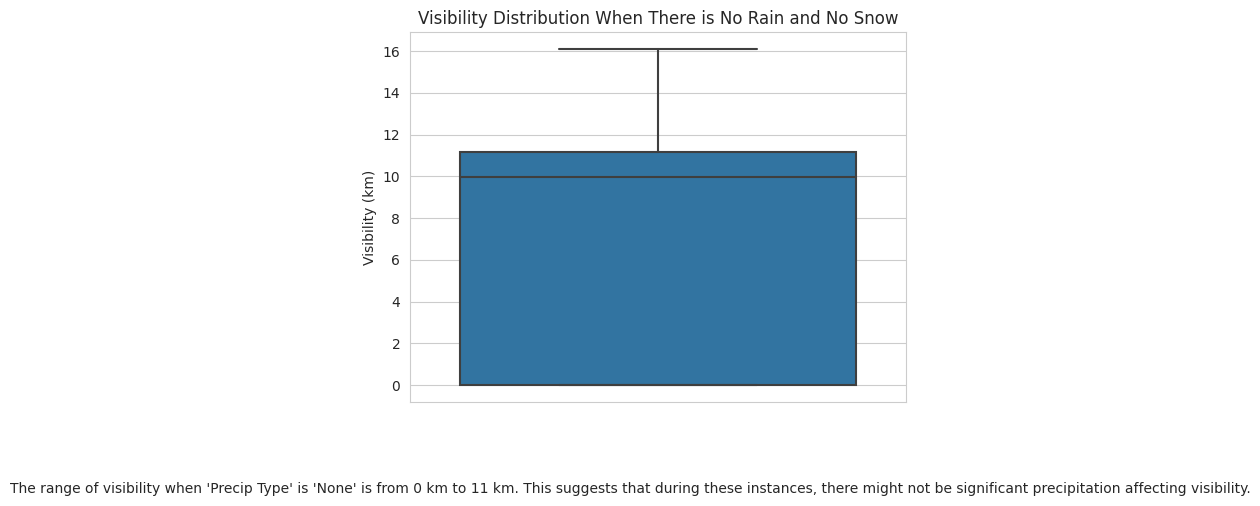

In [ ]:
# CORRELATION BETWEEN PRECIP TYPE NONE AND VISIBILITY
no_rain_snow = weather_dataset[(weather_dataset['Rain'] == 0) & (weather_dataset['Snow'] == 0)]
sns.boxplot(y='Visibility (km)', data=no_rain_snow)
plt.ylabel('Visibility (km)')
plt.title('Visibility Distribution When There is No Rain and No Snow')
plt.figtext(-0.5, -0.06, "The range of visibility when 'Precip Type' is 'None' is from 0 km to 11 km. This suggests that during these instances, there might not be significant precipitation affecting visibility.")
plt.show()

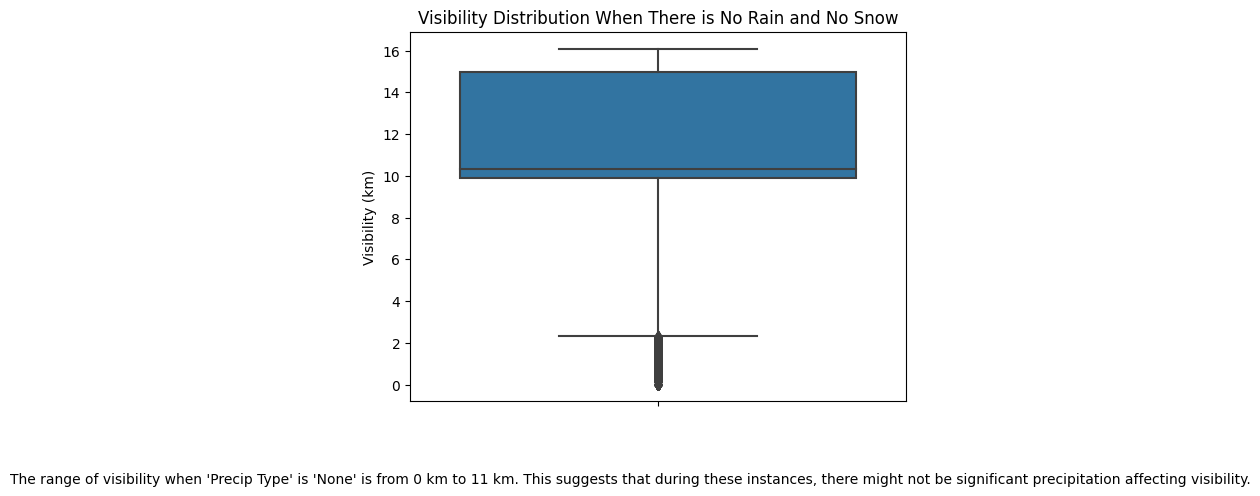

In [ ]:
no_rain_snow = weather_dataset[(weather_dataset['Rain'] == 1) & (weather_dataset['Snow'] == 0)]
sns.boxplot(y='Visibility (km)', data=no_rain_snow)
plt.ylabel('Visibility (km)')
plt.title('Visibility Distribution When There is No Rain and No Snow')
plt.figtext(-0.5, -0.06, "The range of visibility when 'Precip Type' is 'None' is from 0 km to 11 km. This suggests that during these instances, there might not be significant precipitation affecting visibility.")
plt.show()

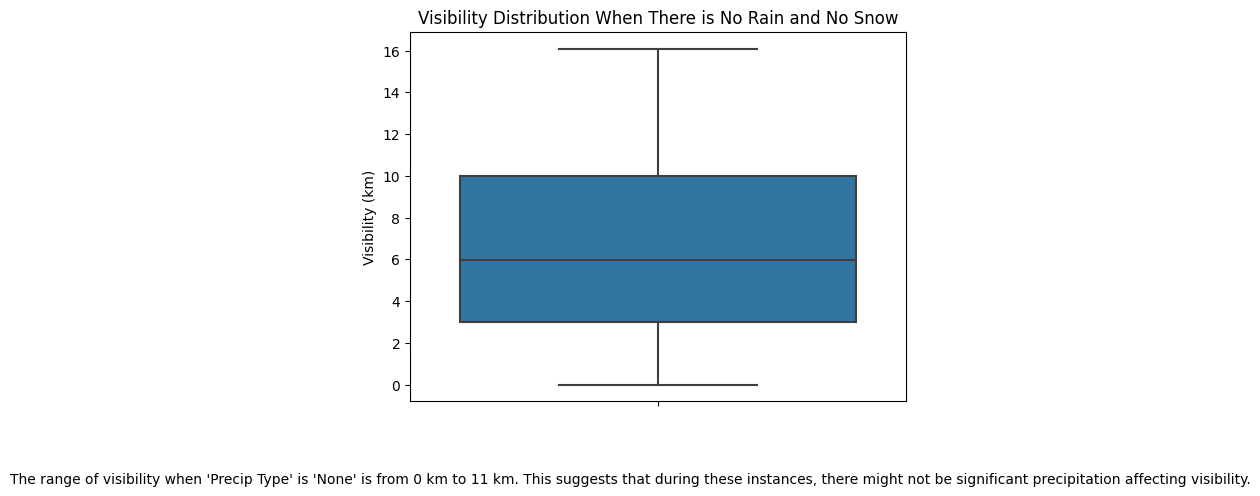

In [ ]:
no_rain_snow = weather_dataset[(weather_dataset['Rain'] == 0) & (weather_dataset['Snow'] == 1)]
sns.boxplot(y='Visibility (km)', data=no_rain_snow)
plt.ylabel('Visibility (km)')
plt.title('Visibility Distribution When There is No Rain and No Snow')
plt.figtext(-0.5, -0.06, "The range of visibility when 'Precip Type' is 'None' is from 0 km to 11 km. This suggests that during these instances, there might not be significant precipitation affecting visibility.")
plt.show()

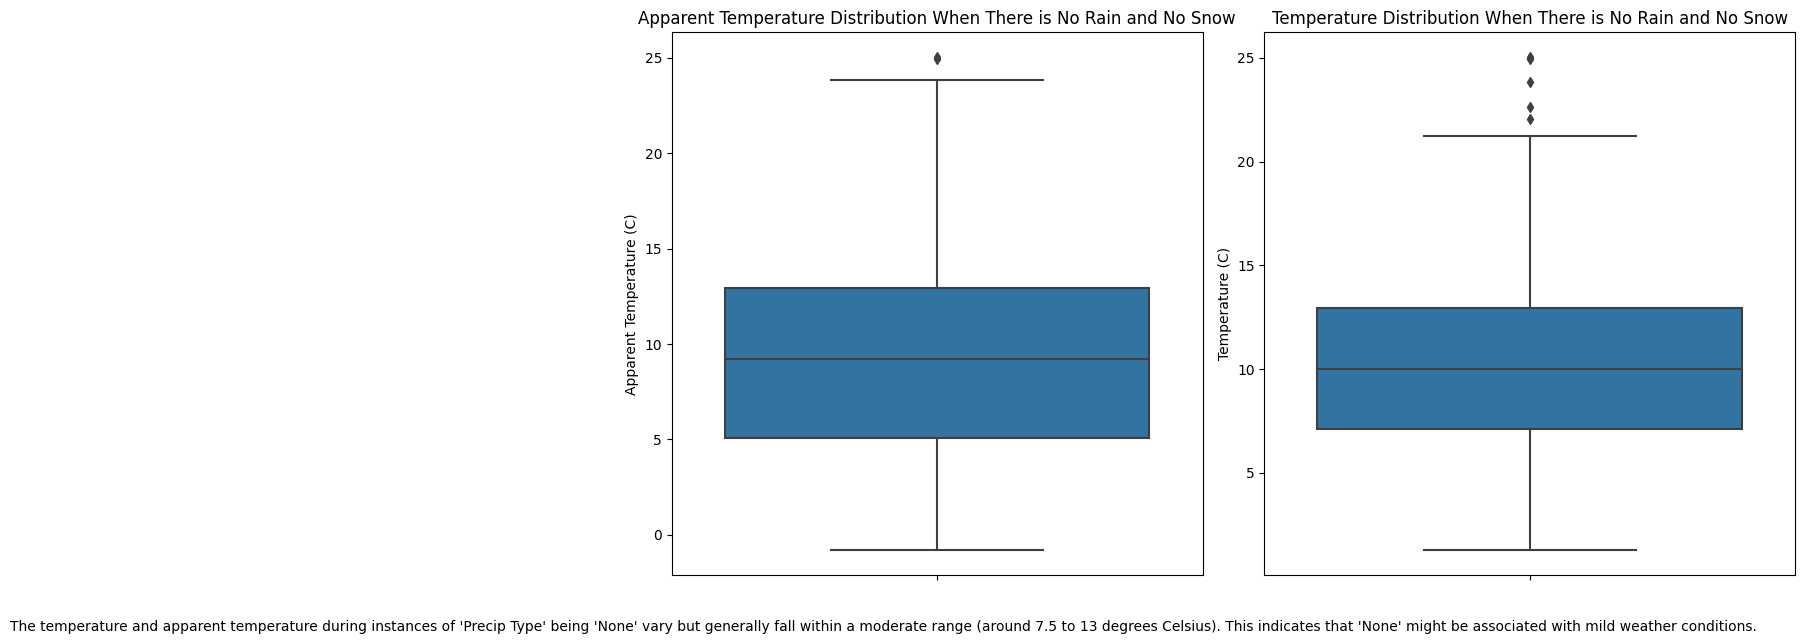

In [ ]:
# CORRELATION BETWEEN PRECIP TYPE NONE AND (APPARENT) TEMPERATURE
no_rain_snow = weather_dataset[(weather_dataset['Rain'] == 0) & (weather_dataset['Snow'] == 0)]

# Create a subplot with two columns
plt.figure(figsize=(12, 6))

# First subplot for Apparent Temperature
plt.subplot(1, 2, 1)
sns.boxplot(y='Apparent Temperature (C)', data=no_rain_snow)
plt.ylabel('Apparent Temperature (C)')
plt.title('Apparent Temperature Distribution When There is No Rain and No Snow')

# Second subplot for Temperature
plt.subplot(1, 2, 2)
sns.boxplot(y='Temperature (C)', data=no_rain_snow)
plt.ylabel('Temperature (C)')
plt.title('Temperature Distribution When There is No Rain and No Snow')


plt.tight_layout()
plt.figtext(-0.5, -0.06, "The temperature and apparent temperature during instances of 'Precip Type' being 'None' vary but generally fall within a moderate range (around 7.5 to 13 degrees Celsius). This indicates that 'None' might be associated with mild weather conditions.")
plt.show()

Text(-0.5, -0.06, "The humidity during 'None' instances ranges from 0.66 to 0.86. This suggests moderate to high humidity levels during these periods.")

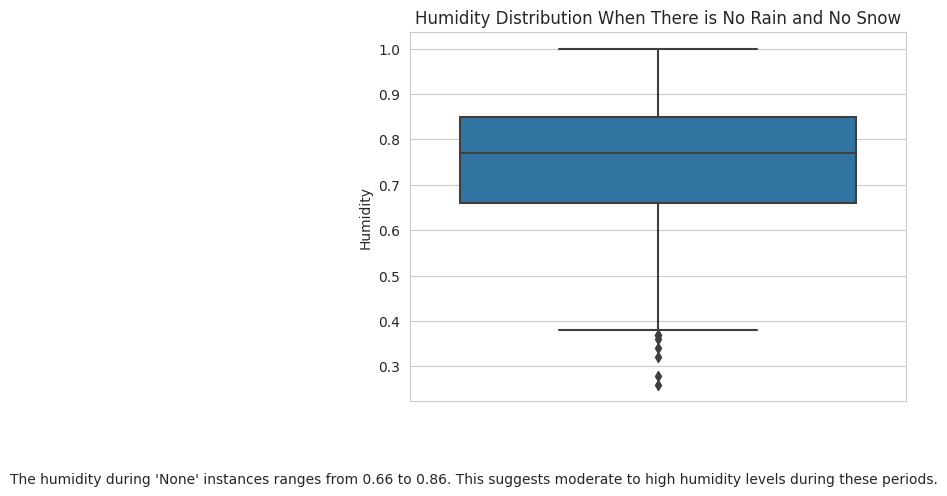

In [ ]:
# CORRELATION BETWEEN PRECIP TYPE NONE AND HUMIDITY
no_rain_snow = weather_dataset[(weather_dataset['Rain'] == 0) & (weather_dataset['Snow'] == 0)]
sns.boxplot(y='Humidity', data=no_rain_snow)
plt.ylabel('Humidity')
plt.title('Humidity Distribution When There is No Rain and No Snow')
plt.figtext(-0.5, -0.06, "The humidity during 'None' instances ranges from 0.66 to 0.86. This suggests moderate to high humidity levels during these periods.")

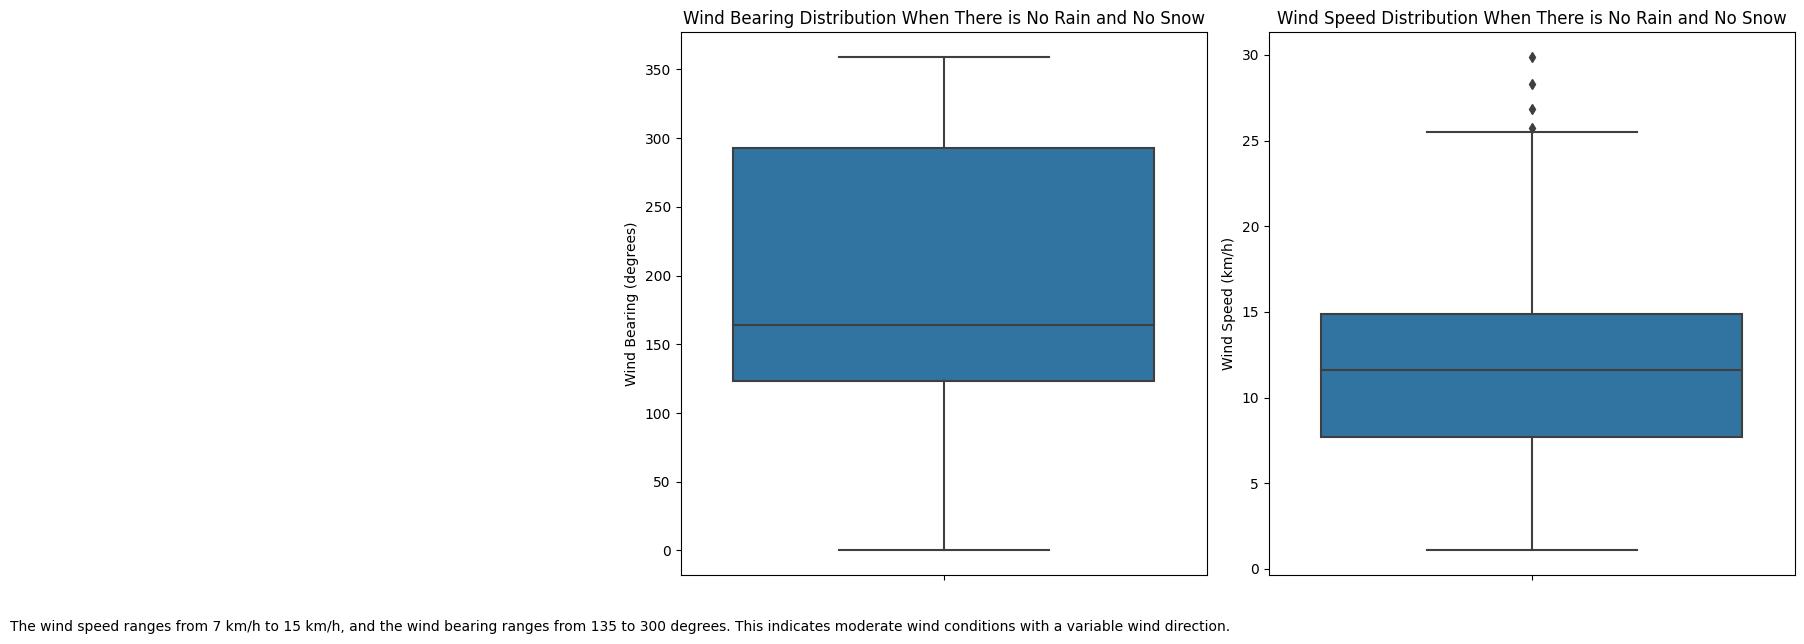

In [ ]:
# CORRELATION BETWEEN PRECIP TYPE NONE AND WIND SPEED (BEARING)
no_rain_snow = weather_dataset[(weather_dataset['Rain'] == 0) & (weather_dataset['Snow'] == 0)]

# Create a subplot with two columns
plt.figure(figsize=(12, 6))

# First subplot for Wind Bearing
plt.subplot(1, 2, 1)
sns.boxplot(y='Wind Bearing (degrees)', data=no_rain_snow)
plt.ylabel('Wind Bearing (degrees)')
plt.title('Wind Bearing Distribution When There is No Rain and No Snow')

# Second subplot for Wind Speed
plt.subplot(1, 2, 2)
sns.boxplot(y='Wind Speed (km/h)', data=no_rain_snow)
plt.ylabel('Wind Speed (km/h)')
plt.title('Wind Speed Distribution When There is No Rain and No Snow')

plt.tight_layout()
plt.figtext(-0.5, -0.06, "The wind speed ranges from 7 km/h to 15 km/h, and the wind bearing ranges from 135 to 300 degrees. This indicates moderate wind conditions with a variable wind direction.")
plt.show()

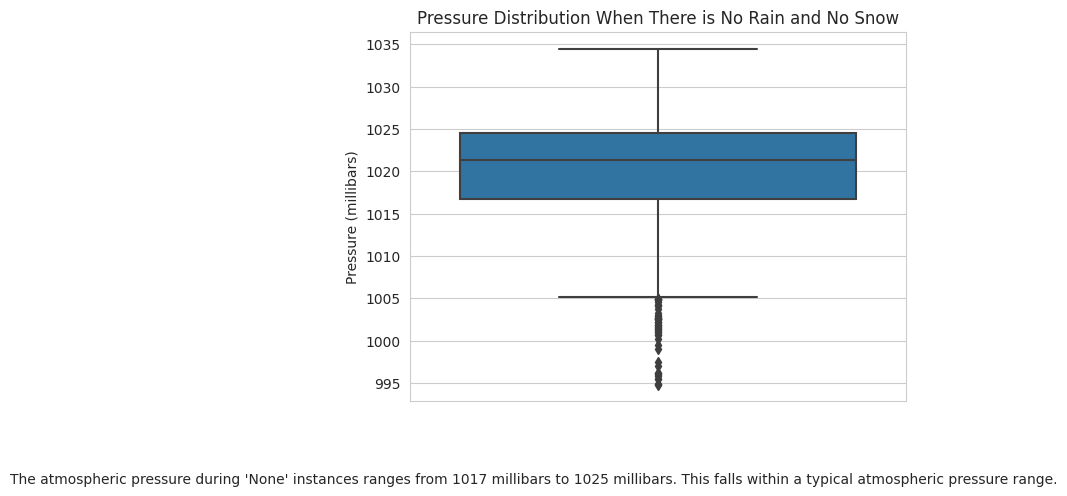

In [ ]:
# CORRELATION BETWEEN PRECIP TYPE NONE AND PRESSURE
no_rain_snow = weather_dataset[(weather_dataset['Rain'] == 0) & (weather_dataset['Snow'] == 0)]
sns.boxplot(y='Pressure (millibars)', data=no_rain_snow)
plt.ylabel('Pressure (millibars)')
plt.title('Pressure Distribution When There is No Rain and No Snow')
plt.figtext(-0.5, -0.06, "The atmospheric pressure during 'None' instances ranges from 1017 millibars to 1025 millibars. This falls within a typical atmospheric pressure range.")
plt.show()

In [ ]:
print("'Precip Type' being 'None' might represent periods with relatively mild weather conditions, moderate humidity, moderate wind, and typical atmospheric pressure. It could\n suggest clear or dry weather during those instances. Keep in mind that these are general observations, and further analysis or domain knowledge might provide more insights\n into the specific weather conditions associated with 'Precip Type' being 'None' in your dataset.")

'Precip Type' being 'None' might represent periods with relatively mild weather conditions, moderate humidity, moderate wind, and typical atmospheric pressure. It could
 suggest clear or dry weather during those instances. Keep in mind that these are general observations, and further analysis or domain knowledge might provide more insights
 into the specific weather conditions associated with 'Precip Type' being 'None' in your dataset.


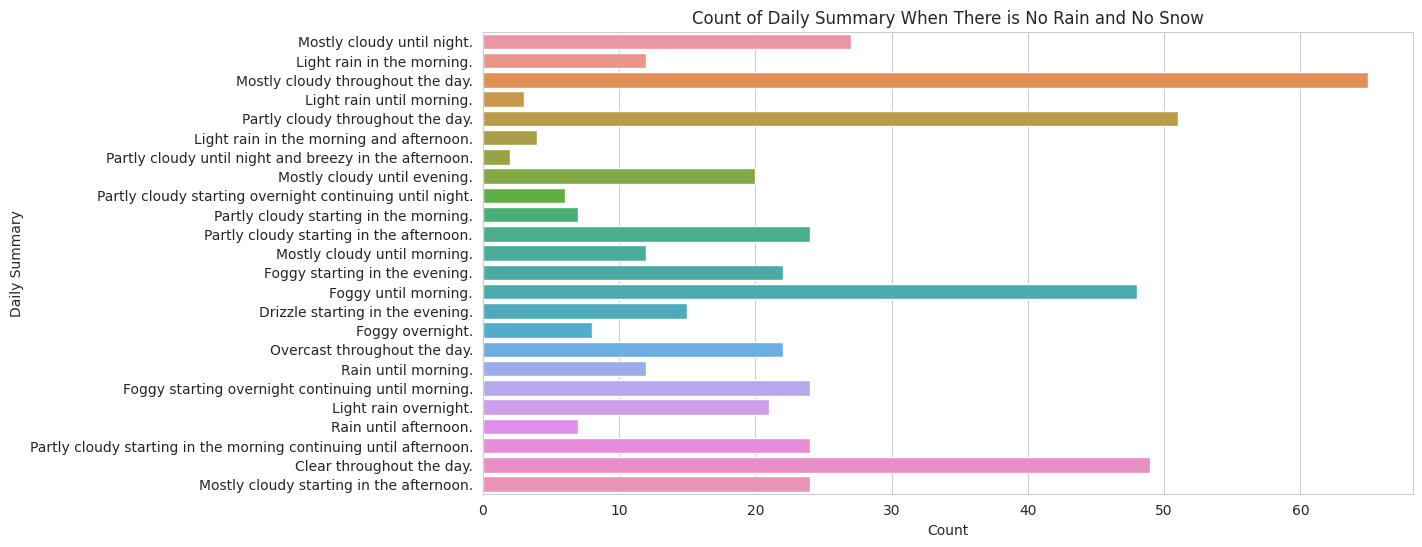

In [ ]:
# CORRELATION BETWEEN PRECIP TYPE NONE AND DAILY SUMMARY
no_rain_snow = weather_dataset[(weather_dataset['Rain'] == 0) & (weather_dataset['Snow'] == 0)]
plt.figure(figsize=(12, 6))
sns.countplot(y='Daily Summary', data=no_rain_snow)
plt.xlabel('Count')
plt.ylabel('Daily Summary')
plt.title('Count of Daily Summary When There is No Rain and No Snow')
plt.show()

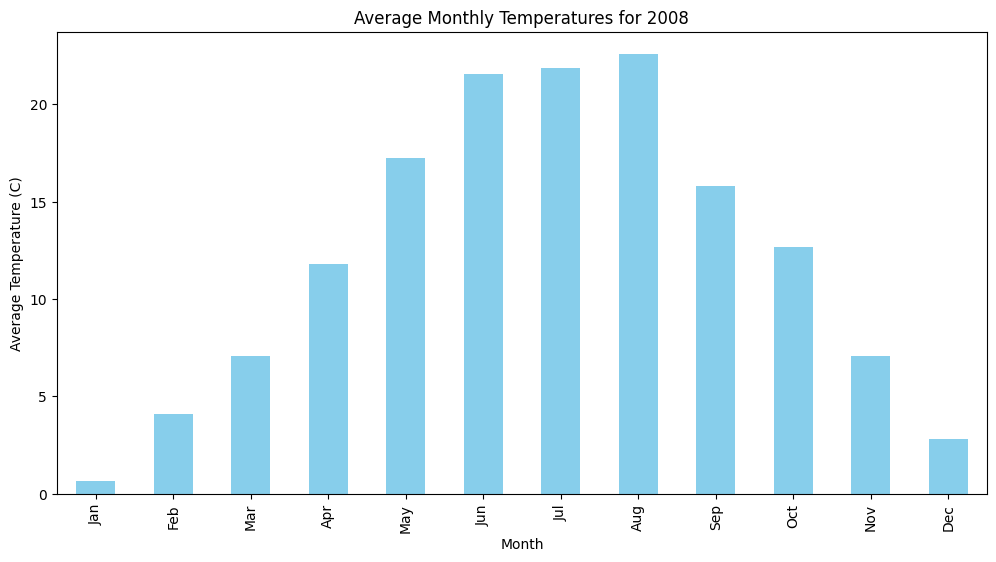

None


In [ ]:
# histogram of an average temperature for every month of a year

def plot_monthly_temperature_for_year(df, year):
    year_data = df[df['Formatted Date'].dt.year == year]
    monthly_avg = year_data.groupby(year_data['Formatted Date'].dt.month)['Temperature (C)'].mean()

    plt.figure(figsize=(12, 6))
    monthly_avg.plot(kind='bar', color='skyblue')

    plt.title(f'Average Monthly Temperatures for {year}')
    plt.xlabel('Month')
    plt.ylabel('Average Temperature (C)')
    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

print(plot_monthly_temperature_for_year(weather_dataset, 2008))

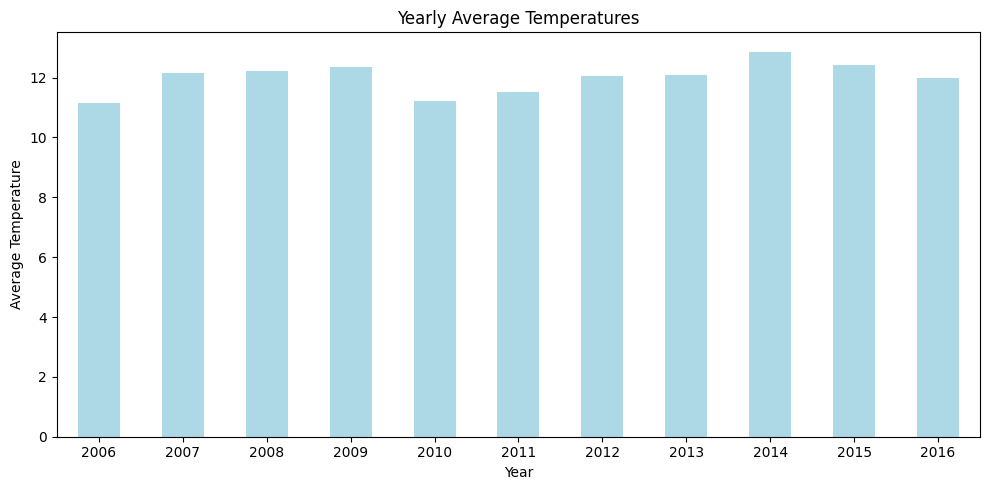

None


In [ ]:
# histogram of an average temperature for every year
def plot_for_comparing_temperature(df):
    yearly_avg = df.groupby(df['Formatted Date'].dt.year)['Temperature (C)'].mean()

    yearly_avg = yearly_avg[yearly_avg.index != 2005]
    plt.figure(figsize=(10, 5))
    yearly_avg.plot(kind='bar', color='lightblue')
    plt.title('Yearly Average Temperatures')
    plt.xlabel('Year')
    plt.ylabel('Average Temperature')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

print(plot_for_comparing_temperature(weather_dataset))


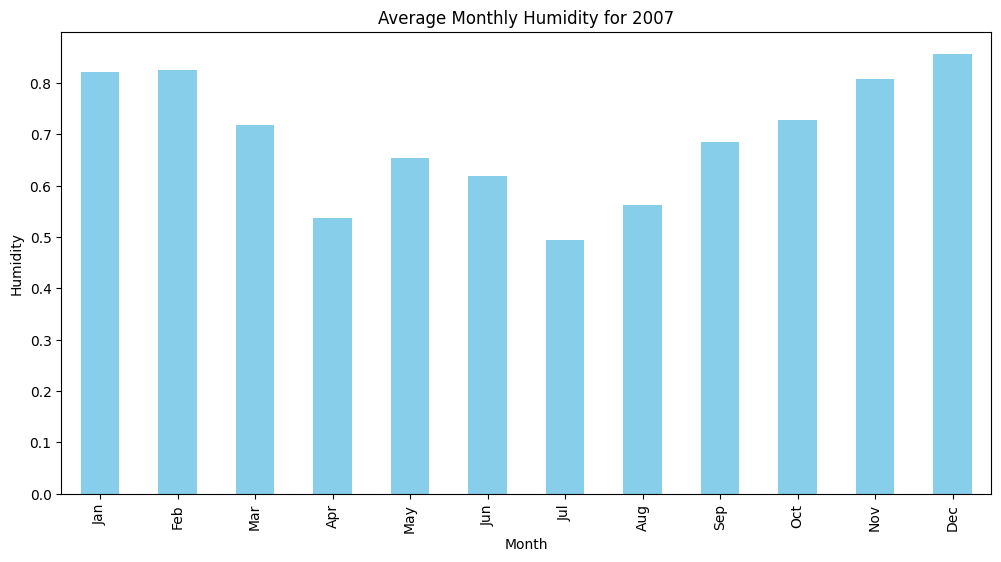

None


In [ ]:
# histogram of an average humidity for every month of a year
def plot_monthly_humidity_for_year(df, year):
    year_data = df[df['Formatted Date'].dt.year == year]
    monthly_avg = year_data.groupby(year_data['Formatted Date'].dt.month)['Humidity'].mean()

    plt.figure(figsize=(12, 6))
    monthly_avg.plot(kind='bar', color='skyblue')

    plt.title(f'Average Monthly Humidity for {year}')
    plt.xlabel('Month')
    plt.ylabel('Humidity')
    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

print(plot_monthly_humidity_for_year(weather_dataset, 2007))

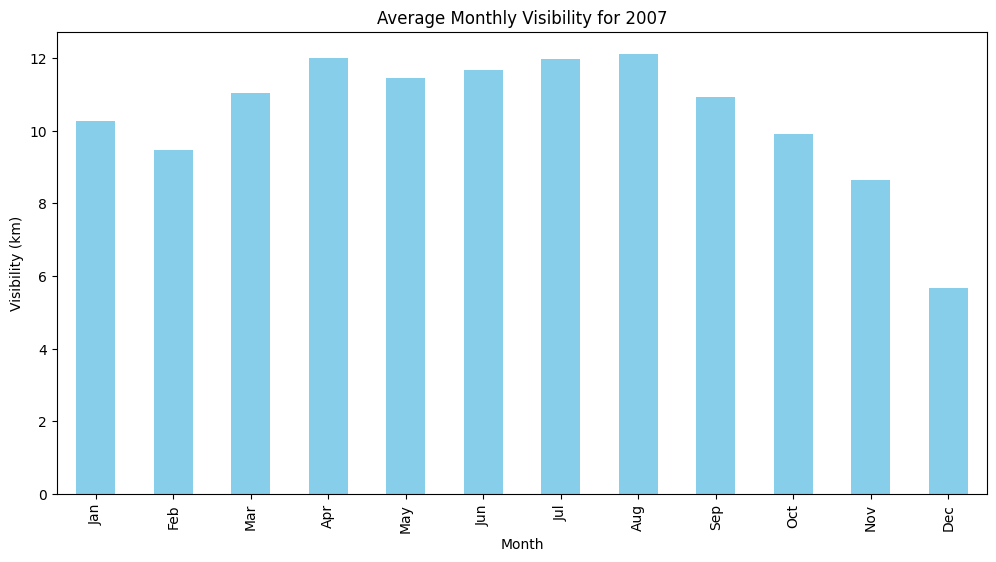

None


In [ ]:
# histogram of an average visibility for every month of a year
def plot_monthly_visibility_of_year(df, year):
    year_data = df[df['Formatted Date'].dt.year == year]
    monthly_avg = year_data.groupby(year_data['Formatted Date'].dt.month)['Visibility (km)'].mean()

    plt.figure(figsize=(12, 6))
    monthly_avg.plot(kind='bar', color='skyblue')

    plt.title(f'Average Monthly Visibility for {year}')
    plt.xlabel('Month')
    plt.ylabel('Visibility (km)')
    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

print(plot_monthly_visibility_of_year(weather_dataset, 2007))

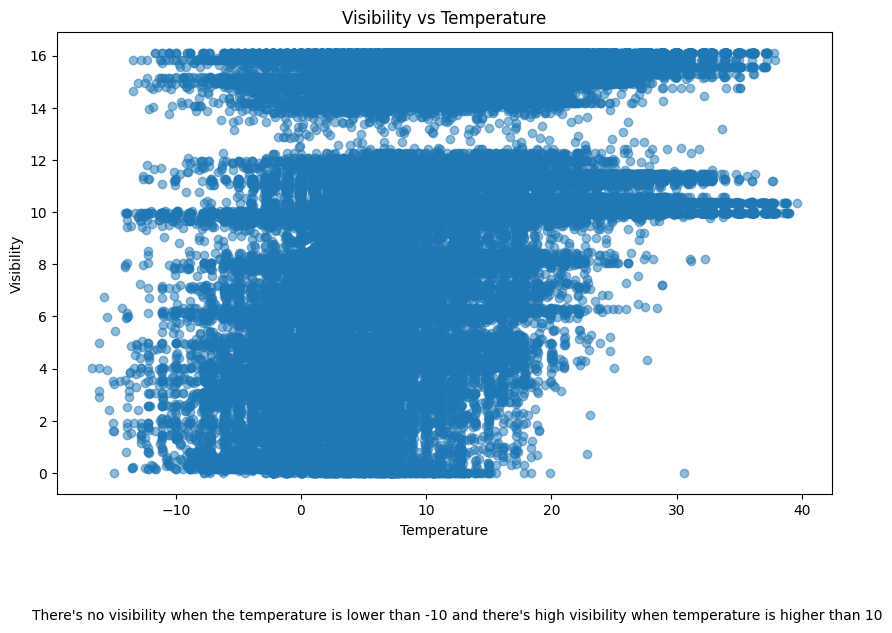

In [ ]:
# dependency of temperature and visibility
plt.figure(figsize=(10, 6))
plt.scatter(weather_dataset['Temperature (C)'], weather_dataset['Visibility (km)'], alpha=0.5)
plt.title('Visibility vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Visibility')
plt.figtext(0.1, -0.1, "There's no visibility when the temperature is lower than -10 and there's high visibility when temperature is higher than 10")
plt.show()

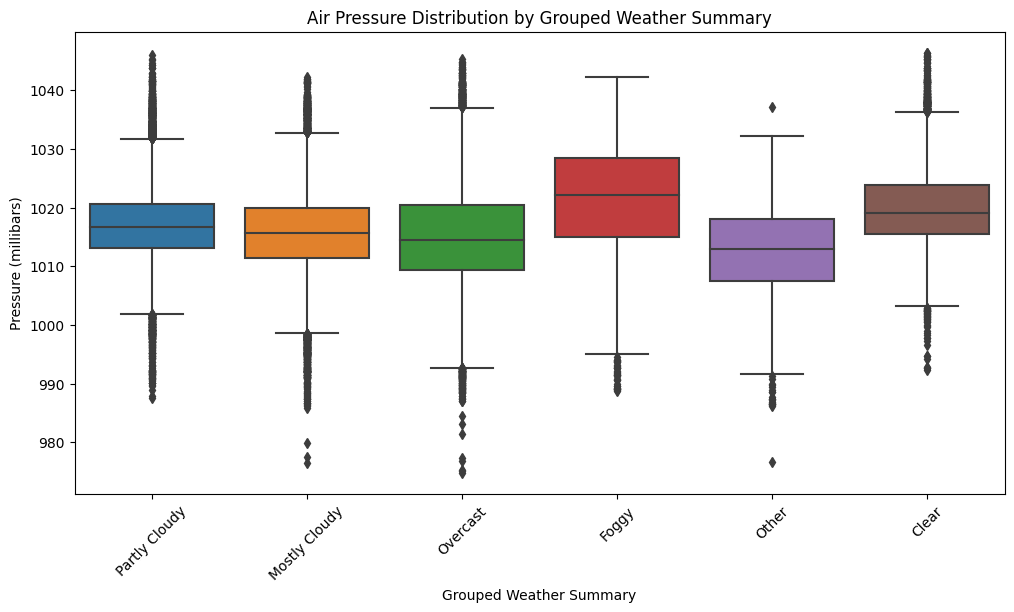

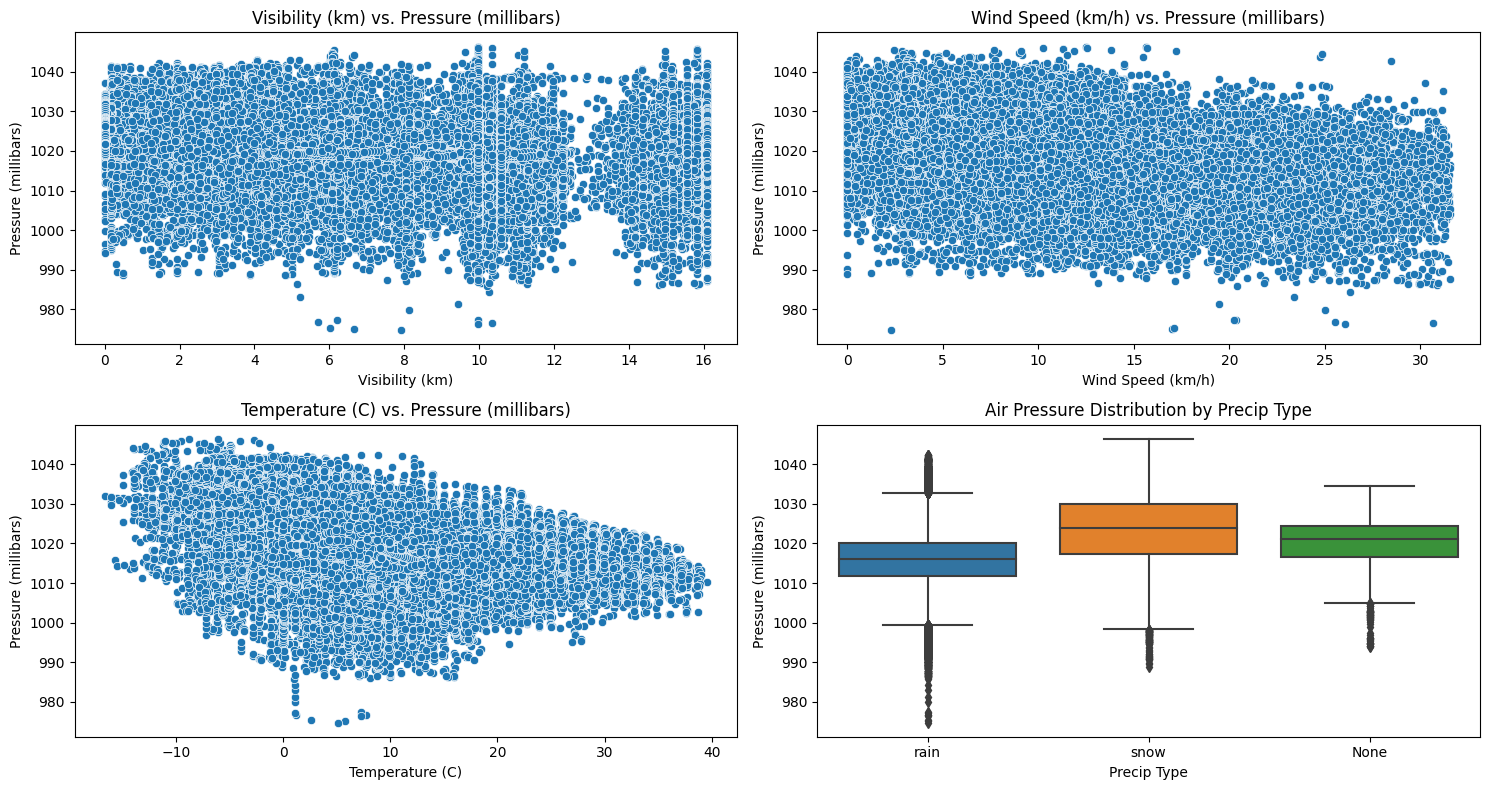

None


In [ ]:
def pressure_and_other(df):
    # Grouping 'Summary' categories with occurrences less than 5000 into an 'Other' category
    summary_counts = df['Summary'].value_counts()
    low_count_summary_types = summary_counts[summary_counts < 5000].index
    df['Grouped Summary'] = df['Summary'].replace(low_count_summary_types, 'Other')

    # Box plot for Grouped Weather Summary vs Pressure
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Grouped Summary', y='Pressure (millibars)', data=df)
    plt.title('Air Pressure Distribution by Grouped Weather Summary')
    plt.xlabel('Grouped Weather Summary')
    plt.ylabel('Pressure (millibars)')
    plt.xticks(rotation=45)
    plt.show()

    # Creating subplots for multiple analyses
    fig, axes = plt.subplots(2, 2, figsize=(15, 8))

    # Scatter plot for Visibility vs Pressure
    sns.scatterplot(ax=axes[0, 0], data=df, x='Visibility (km)', y='Pressure (millibars)')
    axes[0, 0].set_title('Visibility (km) vs. Pressure (millibars)')
    axes[0, 0].set_xlabel('Visibility (km)')
    axes[0, 0].set_ylabel('Pressure (millibars)')

    # Scatter plot for Wind Speed vs Pressure
    sns.scatterplot(ax=axes[0, 1], data=df, x='Wind Speed (km/h)', y='Pressure (millibars)')
    axes[0, 1].set_title('Wind Speed (km/h) vs. Pressure (millibars)')
    axes[0, 1].set_xlabel('Wind Speed (km/h)')
    axes[0, 1].set_ylabel('Pressure (millibars)')

    # Box plot for Precip Type vs Pressure
    sns.boxplot(ax=axes[1, 1], x='Precip Type', y='Pressure (millibars)', data=df)
    axes[1, 1].set_title('Air Pressure Distribution by Precip Type')
    axes[1, 1].set_xlabel('Precip Type')
    axes[1, 1].set_ylabel('Pressure (millibars)')

    # Scatter plot for Temperature vs Pressure
    sns.scatterplot(ax=axes[1, 0], data=df, x='Temperature (C)', y='Pressure (millibars)')
    axes[1, 0].set_title('Temperature (C) vs. Pressure (millibars)')
    axes[1, 0].set_xlabel('Temperature (C)')
    axes[1, 0].set_ylabel('Pressure (millibars)')

    plt.tight_layout()
    plt.show()

print(pressure_and_other(weather_dataset))